In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python inclass practice 7: PDF, CDF, Extreme events

### In this practice, we will continue using the data from last lab
Site id: 04216000 (Niagara River near Buffalo NY) </br>
Site id: 04215000 (Cayuga Creek near Lancaster NY) </br>

## 0. Prep: read in the data

In [2]:
# just in case you did not get through the first section
df_concat_sel = pd.read_csv("../data/python_inclass_practice_6.data.csv",index_col=0,parse_dates=True)

# 1. PDF & CDF

## 1.1. Probability Density Function

For discrete sample data, we usually use histogram `plt.hist` to visualize it. </br>
Note: this plotting function has an option called `density`. If `density=False`, the plot will show the count falling within each bin. If `density=True`, the plot will show the probability density.

Text(0.5, 1.0, 'PDF for streamflow in Niagara River')

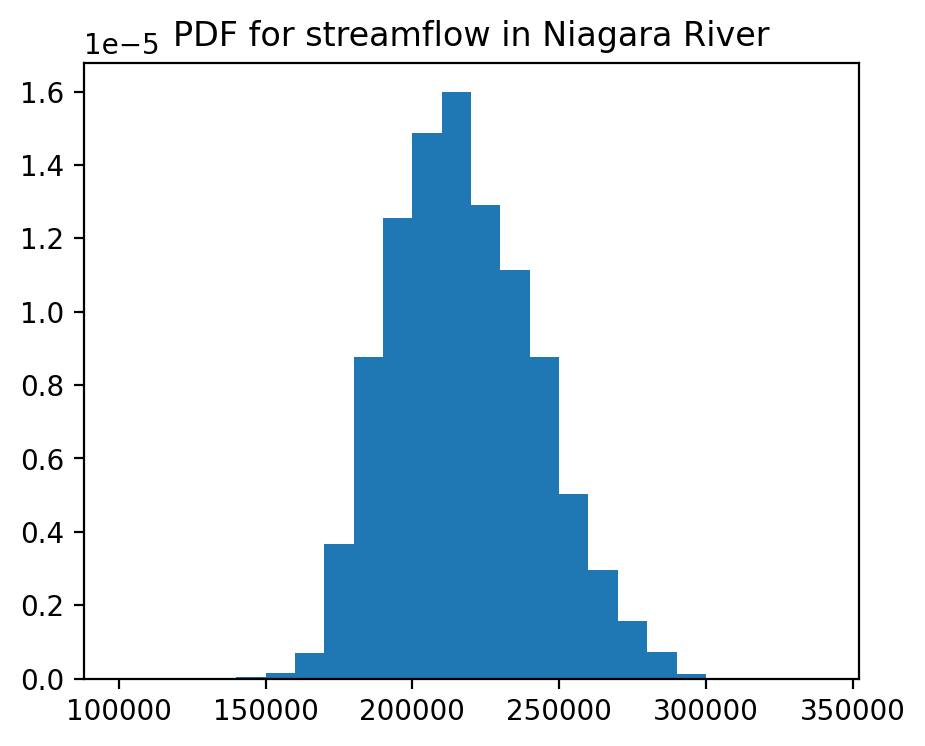

In [3]:
fig,ax = plt.subplots(1, 1,figsize=[5,4],dpi=200)
ax.hist(df_concat_sel['04216000'],bins=np.arange(100000,350000,10000),density=True)
ax.set_title("PDF for streamflow in Niagara River")

### 1.1.1. It is important to choose bin size and scales wisely

For example, the streamflow regime in Cayuga River is very spiky. Most of the time, the flow is between 0-100 cfs, but it also had some very high flow days with thousands cfs. Therefore, if we use normal scale plots with fixed bins, it will look like left plot below. However, if we use log-scale for x-axis with smart selection of bin width, the plot looks much better (like the one on the right).

Text(0.5, 0.98, 'PDF for streamflow in Cayuga Creek')

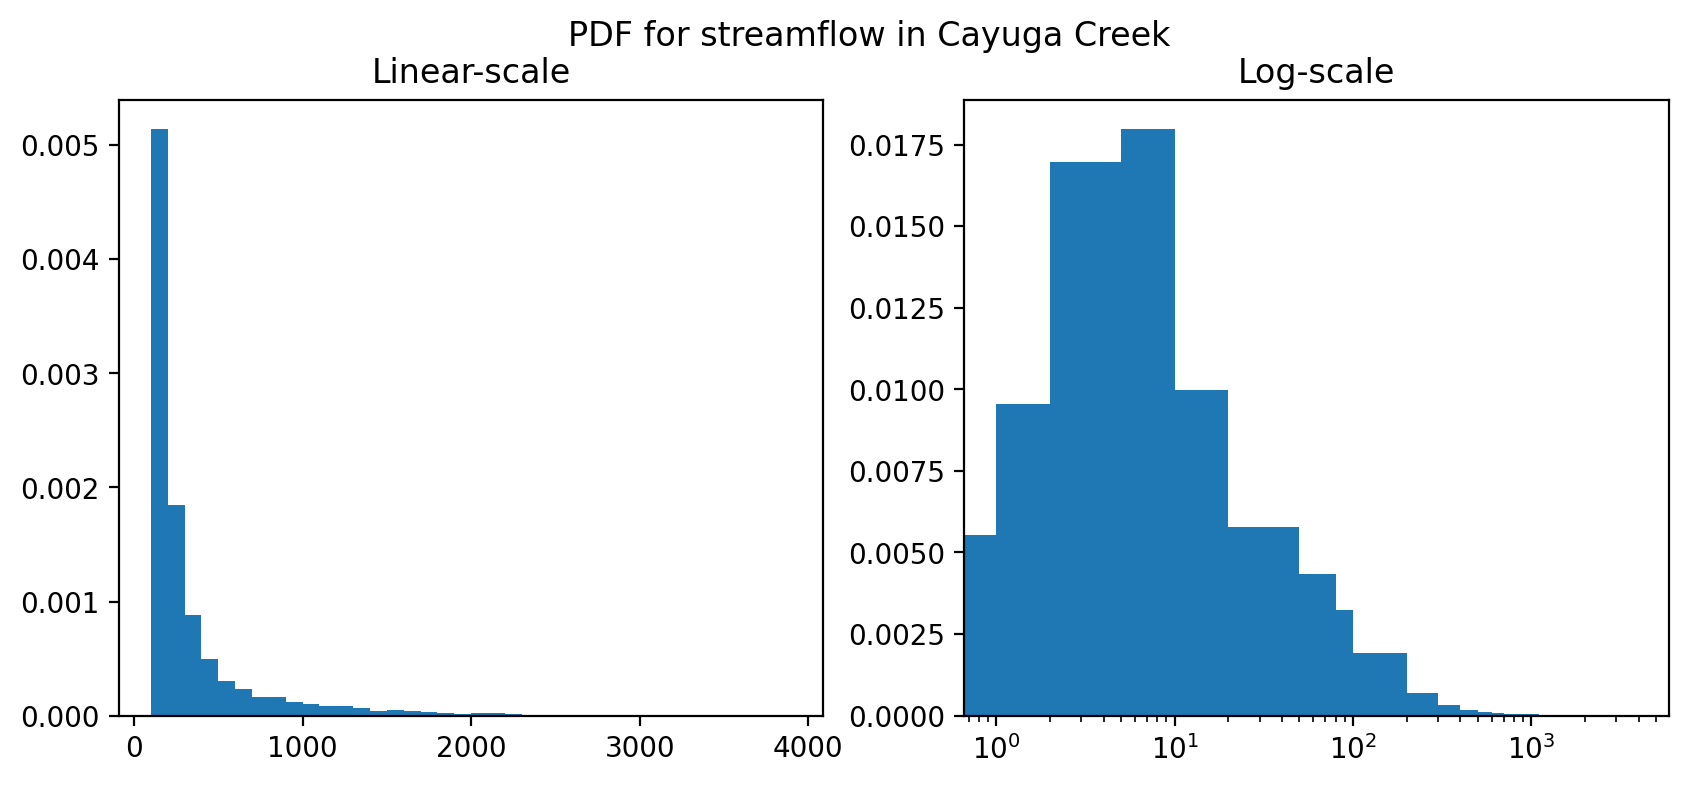

In [4]:
fig,axes = plt.subplots(1, 2,figsize=[10,4],dpi=200)

axes[0].hist(df_concat_sel['04215000'],bins=np.arange(100,4000,100),
             density=True)
axes[1].hist(df_concat_sel['04215000'],bins=np.concatenate([[0,1,2,5,10,20,50,80],
                                                            np.arange(100,4000,100)]),
             density=True)
axes[1].set_xscale('log')
axes[0].set_title("Linear-scale")
axes[1].set_title("Log-scale")

fig.suptitle("PDF for streamflow in Cayuga Creek")

## 1.2. Cumulative Distribution Function

If we have a discrete array of samples, and we would like to know the CDF of the sample, then we can just sort the array. If we look at the sorted result, we'll realize that the smallest value represents 0% , and largest value represents 100 %. Then all other arrays are assigned with evenly distributed probabilities between 0% and 100%.

In [5]:
# Calculate the cumulative proportion of the data that falls below each value
cumulative = np.linspace(0, 1, len(df_concat_sel['04216000']))

# Sort the data in ascending order
sorted_data = np.sort(df_concat_sel['04216000'])

# Calculate the cumulative proportion of the sorted data
cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)

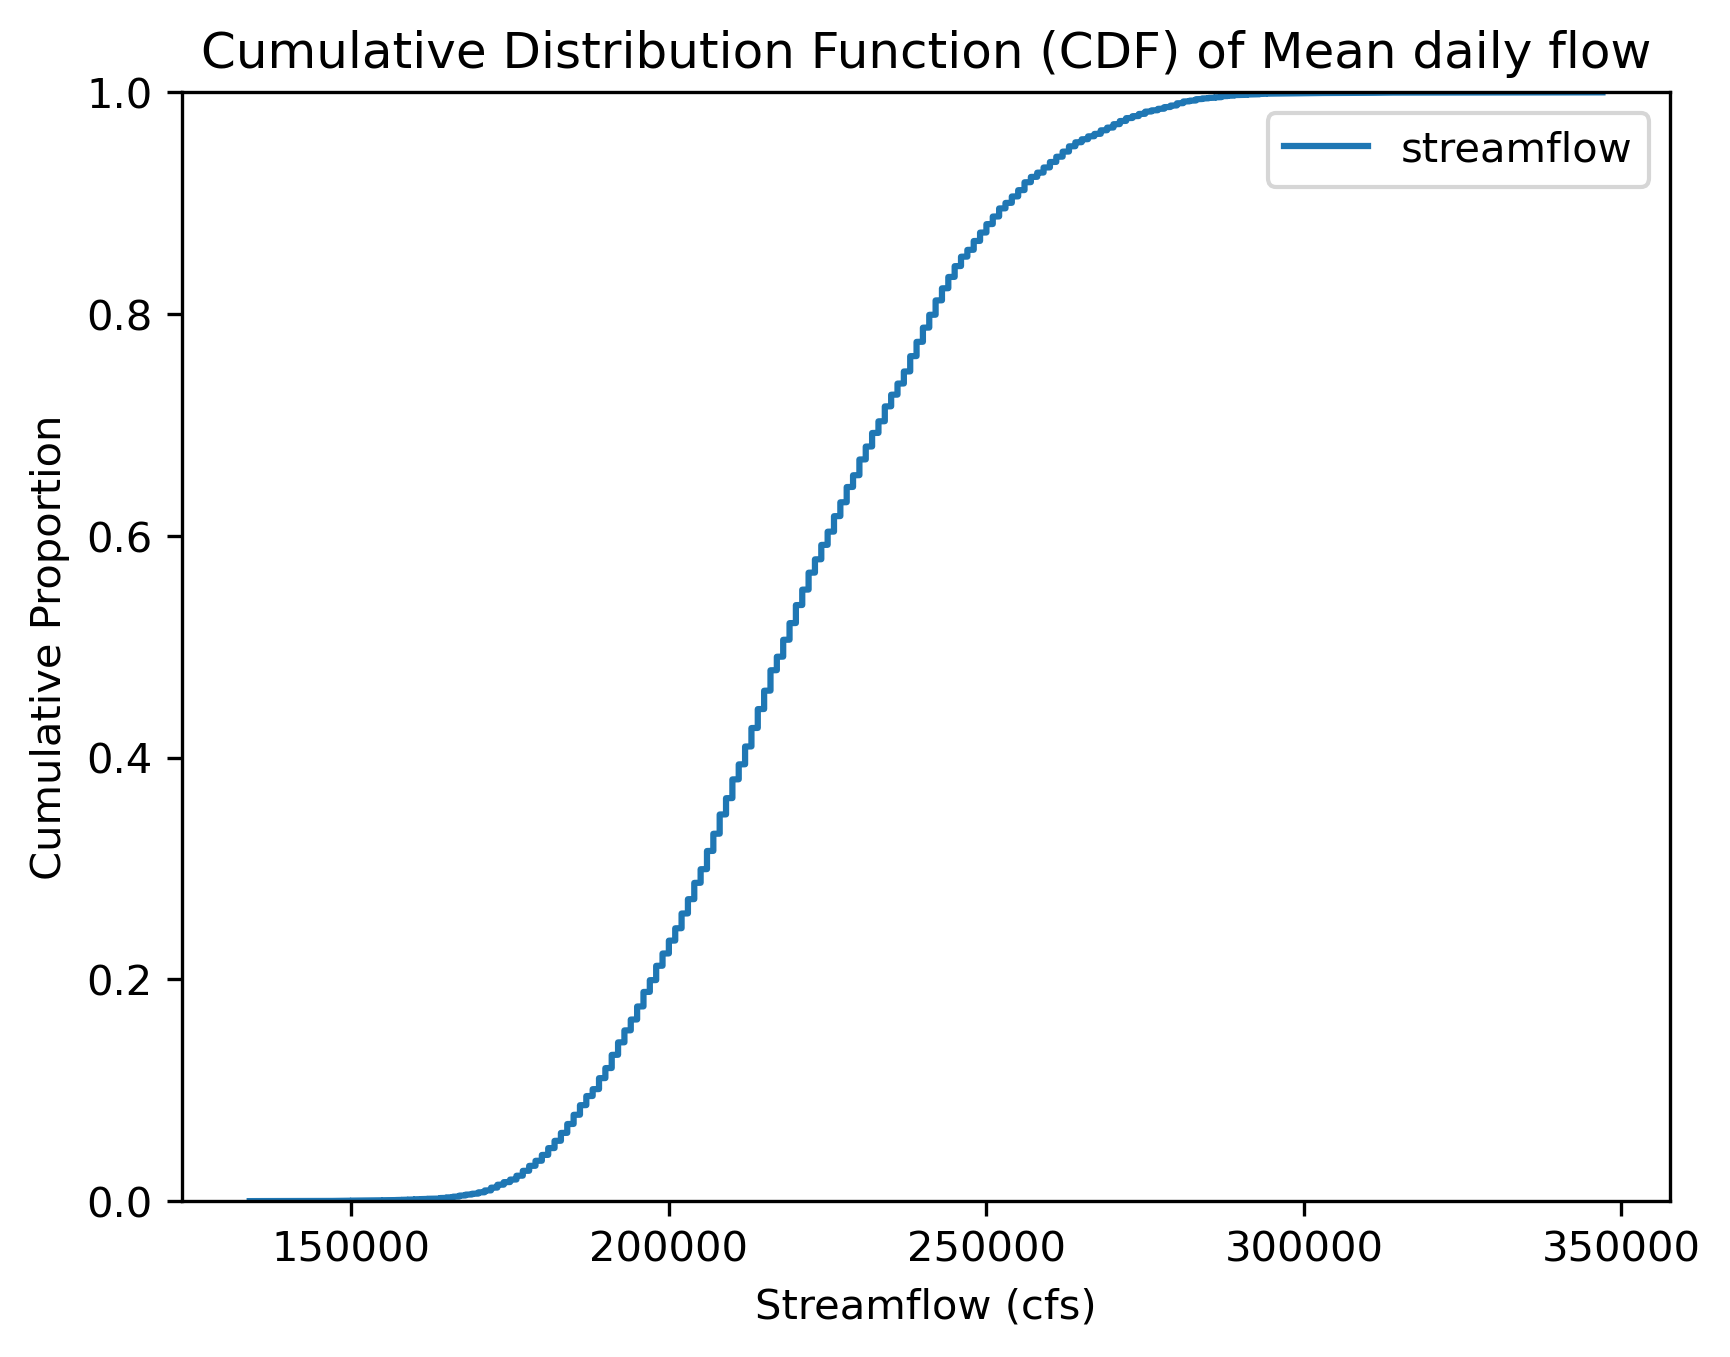

In [6]:
# Plot the CDF
plt.figure(dpi=300)
plt.plot(sorted_data, cumulative_data, label='streamflow')
plt.ylim(0,1)

# Add labels and title
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of Mean daily flow")
plt.legend()
plt.show()

## 1.2.1. Practice #1: plot CDF for Cayuga River. 

In [ ]:
# Please insert your code here

## 1.3. 100-year return floods

As we discussed in class, to calculate the 100-year return floods, we can follow the three steps:
1. Identify annual peak flow `groupby`
2. Calculate the CDF for annual peak flow
3. Calculate the Annual exceedance probability (AEP)
4. In the AEP, find the flow value corresponds to AEP = 1%.

#### 1.3.1. Step 1: Identify annual peak flow

In [7]:
# Step 1: Identify annual peak flow
df_annual_max = df_concat_sel.groupby(df_concat_sel.index.year).max()
df_annual_max

,04216000,04215000
date,,
1980,284000.0,2000.0
1981,253000.0,1830.0
1982,284000.0,3600.0
1983,278000.0,1560.0
1984,256000.0,3100.0
1985,347000.0,5830.0
1986,294000.0,2600.0
1987,283000.0,2270.0
1988,243000.0,1320.0


#### 1.3.2. calculate cdf

In [8]:
# 2: calculate cdf
# Calculate the cumulative proportion of the data that falls below each value
cumulative_n = np.linspace(0, 1, len(df_annual_max['04216000']))

# Sort the data in ascending order
sorted_data_n = np.sort(df_annual_max['04216000'])

# Calculate the cumulative proportion of the sorted data
cumulative_data_n = np.cumsum(sorted_data_n) / np.sum(sorted_data_n)

In [9]:
cumulative_data_n

array([0.0197091 , 0.03993459, 0.06041828, 0.08098804, 0.10155779,
       0.12229968, 0.1432137 , 0.16421379, 0.18538601, 0.20664429,
       0.22824684, 0.24993545, 0.27171013, 0.29348481, 0.31534555,
       0.33737843, 0.35949737, 0.38178845, 0.40425166, 0.42671486,
       0.44943627, 0.47224374, 0.49530941, 0.51863327, 0.54238747,
       0.56622773, 0.59015406, 0.61408039, 0.63843704, 0.66287977,
       0.68732249, 0.71202341, 0.7368104 , 0.76168345, 0.7865565 ,
       0.81160169, 0.83673294, 0.86203632, 0.88742577, 0.91402014,
       0.94095877, 0.97013512, 1.        ])

#### 1.3.3. calculate AEP

In [10]:
# 3: calculate AEP
aep_n = 1 - cumulative_data_n

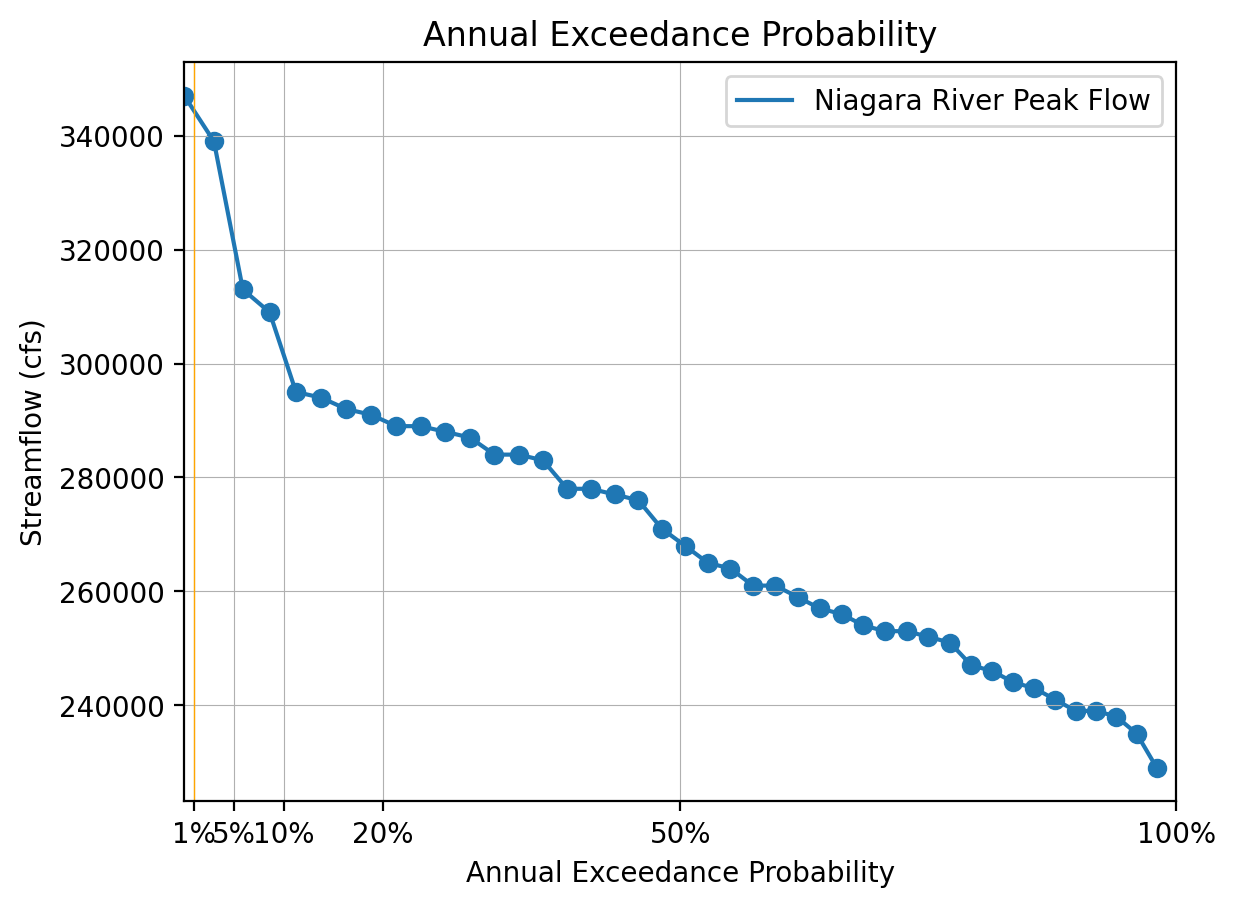

In [11]:
# visualize AEP
plt.figure(dpi=200)
plt.plot(aep_n, sorted_data_n,  label='Niagara River Peak Flow')
plt.scatter(aep_n, sorted_data_n)
plt.axvline(0.01,lw=0.5,c='orange')
plt.xlim(0,1)
aep_list = np.array([0.01,0.05,0.1,0.2,0.5,1])
aep_str = []
for i in aep_list:
    if i*100<1:
        aep_str.append("%s%%"%(i*100))
    else:
        aep_str.append("%i%%"%(i*100))
plt.xticks(aep_list,aep_str)
plt.grid(lw=0.4)

# Add labels and title
plt.ylabel("Streamflow (cfs)")
plt.xlabel("Annual Exceedance Probability")
plt.title("Annual Exceedance Probability")
plt.legend()
plt.show()

#### 1.3.4. find the flow corresponds to AEP = 0.01

In [12]:
# 4: find the flow corresponds to AEP = 0.01

# Basically, we need to find the y value that 
# corresponds to the intersection of orange line 
# and blue dotted line above

# asp_n[::-1] reverse this array, for example
# a = [0,1,2], and a[::-1] will output [2,1,0]

# The reason behind reverse the asp_n is
# np.interp requires an monotonically increasing 
# sample points but our asp_n was in monotonically
# decreasing order.

flow_100yr_flood_n = np.interp(0.01, aep_n[::-1], sorted_data_n[::-1])
print("The flood with 100-year recurrence interval is %.2f cfs"%(flow_100yr_flood_n))

The flood with 100-year recurrence interval is 344321.27 cfs


## 1.4.1. Practice #2: Please output the 100-year flood for Cayuga River

In [ ]:
# Insert your code here

## 1.5. 7Q10 for evaluating low flows!
### 1.5.1. We first need to calculate the minimum annual 7-day average flow
The syntax for rolling average is quite simple! </br>
We can use `df.rolling()` to calculate the rolling average. </br>

In [13]:
df_rolling_7day_mean = df_concat_sel.rolling(7,center=True).mean()

In [14]:
df_rolling_7day_mean

,04216000,04215000
date,,
1980-01-01,NaN,NaN
1980-01-02,NaN,NaN
1980-01-03,NaN,NaN
1980-01-04,229285.714286,77.285714
1980-01-05,233142.857143,63.285714
...,...,...
2022-12-27,235857.142857,380.000000
2022-12-28,217571.428571,520.285714
2022-12-29,NaN,NaN


# Note: the first three days and last three days does not have data!
Because data was not available for the nearby 7-days at those dates.

### 1.5.2. Here we simply drop the NAN in the moving average

In [15]:
df_rolling_7day_mean = df_rolling_7day_mean.dropna()

### 1.5.3. Practice #3: Can you calculate the 7Q10 for Niagara River?
This is definitely a harder exercise! However, the philosophy behind the calculation is very similar to how we calculate the annual peak flow with 100-year recurrence interval.

7Q10 is the 7-day average annual low flow with 10-year recurrence interval.

1. Calculate the 7-day average flow (we have done in **1.5.1/1.5.2**)
2. Find the annual minimum 7-day average flow (use groupby, see Section **1.3.1**)
3. Calculate CDF, which equals to Annual Non-exceedance Probability (ANEP)!!
4. Find the flow corresponds to ANEP = 0.1 (which corresponds to 10-year recurrence interval)

In [19]:
# Step 1: Identify annual 7-day low flow
df_annual_min_flow = df_rolling_7day_mean.groupby(df_rolling_7day_mean.index.year).min()


In [20]:
# Step 2: calculate cdf, which equals to anep
# Calculate the cumulative proportion of the data that falls below each value
cumulative_n = np.linspace(0, 1, len(df_annual_min_flow['04216000']))

# Sort the data in ascending order
sorted_data_n = np.sort(df_annual_min_flow['04216000'])

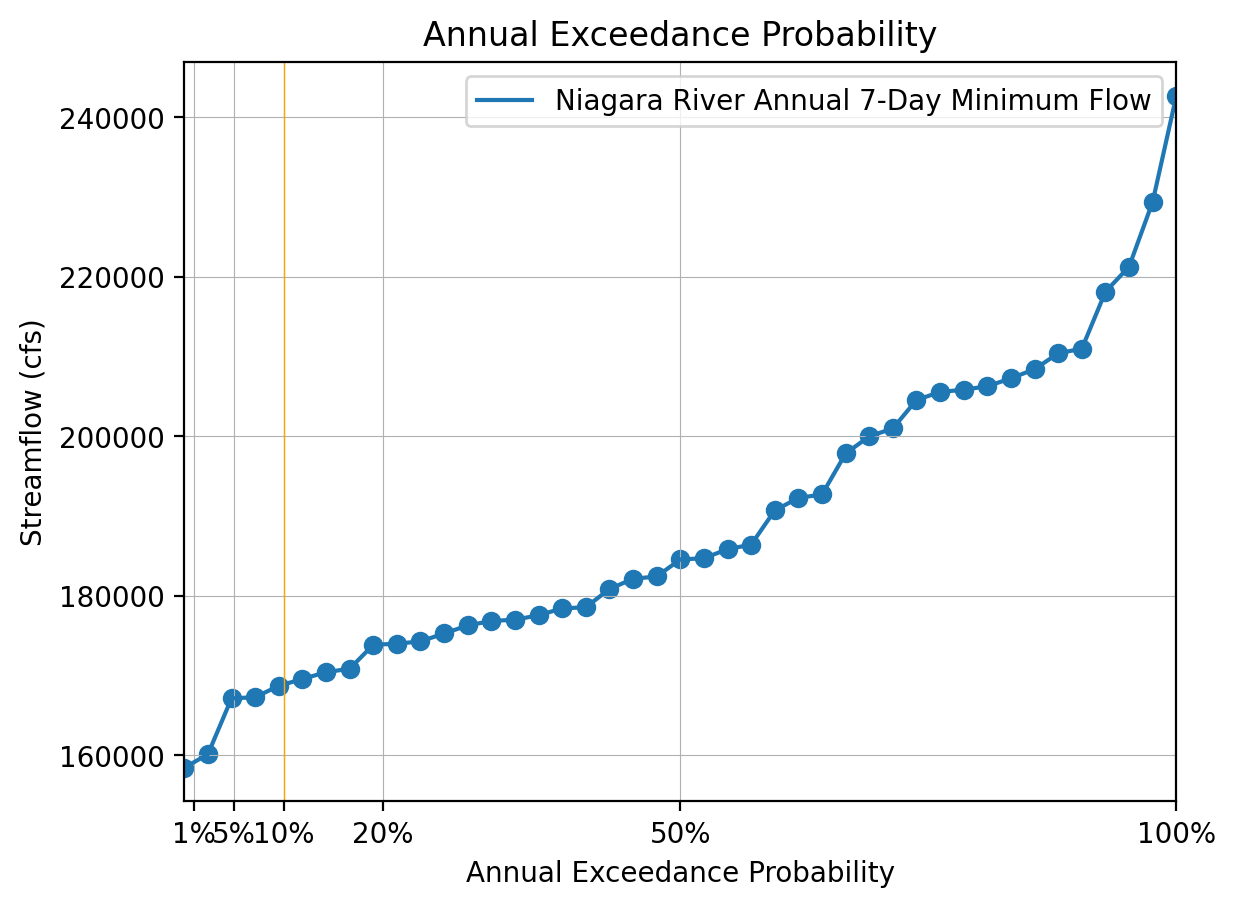

In [ ]:
# Step 3 (optional): visualize ANEP
anep = cumulative_n
# visualize AEP
plt.figure(dpi=200)
plt.plot(anep, sorted_data_n,  label='Niagara River Annual 7-Day Minimum Flow')
plt.scatter(anep, sorted_data_n)
plt.axvline(0.1,lw=0.5,c='orange')
plt.xlim(0,1)
aep_list = np.array([0.01,0.05,0.1,0.2,0.5,1])
aep_str = []
for i in aep_list:
    if i*100<1:
        aep_str.append("%s%%"%(i*100))
    else:
        aep_str.append("%i%%"%(i*100))
plt.xticks(aep_list,aep_str)
plt.grid(lw=0.4)

# Add labels and title
plt.ylabel("Streamflow (cfs)")
plt.xlabel("Annual Non-Exceedance Probability")
plt.title("Annual Non-Exceedance Probability")
plt.legend()
plt.show()

In [23]:
# Step 4: find the flow corresponds to ANEP = 0.1
q_7_10 = np.interp(0.1, anep, sorted_data_n)
print("The 7Q10 is %.2f cfs"%(q_7_10))

The 7Q10 is 168885.71 cfs
